In [1]:
# load libraries

import pandas  as pd

In [5]:
# load data from assets folder
path = 'assets/'
train  = pd.read_csv(path + 'train.csv')
test   = pd.read_csv(path + 'test.csv')

In [6]:
# inspect training data
train.head()

,train_id,comment,sentiment
0,bbe0f441-b2fc-461a-9618-e3a7eb9cb6b7,Habari @telecom1_TZ naomba kujua kama kuna hud...,-1
1,81b3b16d-8bf0-4d46-9b68-d7ffb078d108,@telecom3_tanzania Hivi telecom3 mnatuchukulia...,-1
2,f4785623-6bb9-49de-b905-25911a66f1d3,@telecom2 wamupunguza vifurushi vya internet k...,0
3,0ec5ec2b-0811-4b1d-be70-9cc0c137159a,@telecom2 Kwenye huduma1 nimewakubali sana sem...,-1
4,40082169-ebd0-4ca9-b0d3-c46ac949e034,@IdrisSultan vip kuhusu hawa mzee.\n Umefiki...,0


<AxesSubplot:>

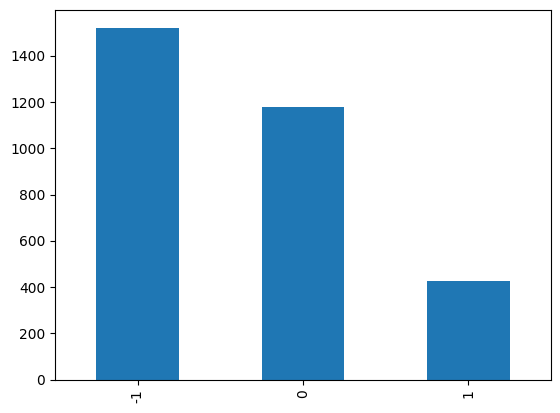

In [7]:
# plot count of sentiments
train.sentiment.value_counts().plot(kind='bar')

In [9]:
# inspect test data
test.head()

,test_id,comment
0,53bb8dff-4a07-4aac-a6f2-ca552389652c,huduma1 wamenitext et wameniona mataa😣
1,a01e1c68-2f77-4073-87c5-d7e5d75c8a79,@telecom1_TZ @telecom3Tanzania Na mtuue sasa
2,9a5e4b98-ac29-4138-bc28-fc878d5d8269,Hakuna mtandao wa simu unaoongoza kutuma messa...
3,9ef55f06-7748-4e02-85c7-fa3e46bb02dd,@Mwanzalimaa Itakuwa kaipenda no yako kaenda k...
4,d93b4084-3000-4026-bae0-ecb65564dbbd,@telecom1_TZ Mm Ni wakala wa usajili wa lain c...


In [10]:
# data cleaning

# Remove duplicate rows
train = train.drop_duplicates()

In [12]:
# Remove rows with missing values
train = train.dropna()

In [15]:
import re

def clean_text(text):
    # Remove special characters, punctuation, and non-Swahili characters
    text = re.sub(r"[^a-zA-Z0-9 \-]", "", text)
    
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    # Remove HTML tags (if available)
    text = re.sub(r"<.*?>", "", text)
    # Normalize whitespace
    text = re.sub(r"\s+", " ", text).strip()
    # remove numbers
    text = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text) 
    text = re.sub(r"\d", "", text)
    # set in lowercase
    text = text.lower()   
    
    # Remove consecutive duplicate characters (e.g., 'loooove' to 'love')
    text = re.sub(r"(.)\1+", r"\1", text)
    
    return text

# Apply text cleaning to the 'text' column
train['comment'] = train['comment'].apply(clean_text)

In [16]:
train.head() # preview data again

,train_id,comment,sentiment
0,bbe0f441-b2fc-461a-9618-e3a7eb9cb6b7,habari telecomtz naomba kujua kama kuna huduma...,-1
1,81b3b16d-8bf0-4d46-9b68-d7ffb078d108,telecomtanzania hivi telecom mnatuchukuliaje y...,-1
2,f4785623-6bb9-49de-b905-25911a66f1d3,telecom wamupunguza vifurushi vya internet kim...,0
3,0ec5ec2b-0811-4b1d-be70-9cc0c137159a,telecom kwenye huduma nimewakubali sana sema i...,-1
4,40082169-ebd0-4ca9-b0d3-c46ac949e034,idrisultan vip kuhusu hawa mze umefikia ya mat...,0
